# Importing the libraries

In [60]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray as rxr
import geopandas as gpd
import pandas as pd
import harmonize as hz
import seaborn as sns
import nc_time_axis
import cftime

# Load the data cube and original data to compare

In [61]:
# Create a path to the data directory
path_data = "../data/Raw/"

In [62]:
# Load the data set
ndvi = xr.open_dataset(path_data + 'Raw_NDVI_16D_1km.nc')
lai = xr.open_dataset(path_data + 'Raw_LAI_8D_500m.nc')
evap = xr.open_dataset(path_data + 'Raw_Evap_8D_500m.nc')
era = xr.open_dataset(path_data + 'Raw_weather_4H_9km.nc')
lst_night = xr.open_dataset(path_data + 'Raw_LST_Night_1D_1km.nc')
lst_day = xr.open_dataset(path_data + 'Raw_LST_Day_1D_1km.nc')
active_fire = xr.open_dataset(path_data + 'Raw_ActiveFire_500m.nc')
burn_mask = xr.open_dataset(path_data + 'Raw_BurnMask_1km.nc')
fwi = xr.open_mfdataset(path_data + '/Raw_Fwi/*.nc', combine='by_coords', chunks=None)
density = rxr.open_rasterio(path_data + 'fra_pd_2015_1km_UNadj.tif', masked=True).squeeze()
datacube = xr.open_dataset(path_data + 'datacube.nc', chunks=None, decode_coords="all")

In [63]:
# Select the variables of interest
ndvi_filter = ndvi['_1_km_16_days_EVI']
lai_filter = lai['Fpar_500m']
evap_filter = evap['ET_500m']
era_filter = era[['u10', 'v10', 't2m', 'tp']]
lst_night_filter = lst_night['LST_Night_1km']
lst_day_filter = lst_day['LST_Day_1km']
# fwi_filter = fwi['fwi-daily-proj']
active_fire_filter = active_fire[['First_Day', 'Last_Day', 'Burn_Date']]
burn_mask_filter = burn_mask['FireMask']

# Comparaison of the datacube and the original data

# NDVI

C:\Users\Quentin\anaconda3\envs\forecast\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


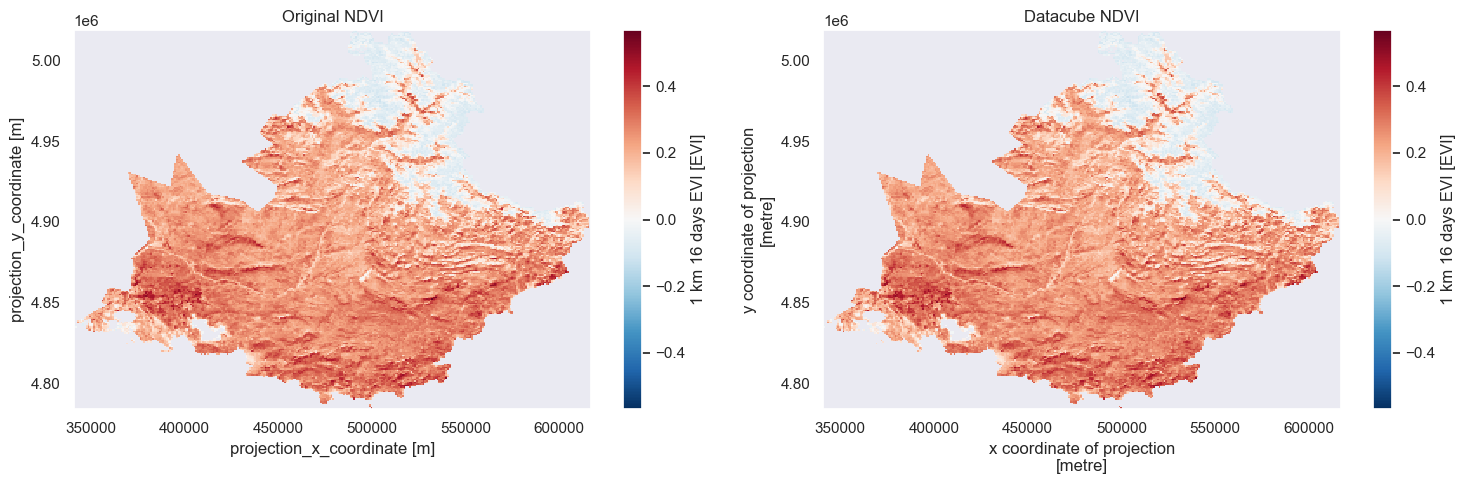

In [64]:
# Plot the EVI from the original dataset and the datacube with seaborn
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ndvi_filter.sel(time='2019-01-01').plot(ax=ax[0])
datacube['_1_km_16_days_EVI'].sel(time='2019-01-01').plot(ax=ax[1])
ax[0].set_title('Original NDVI')
ax[1].set_title('Datacube NDVI')
plt.show()


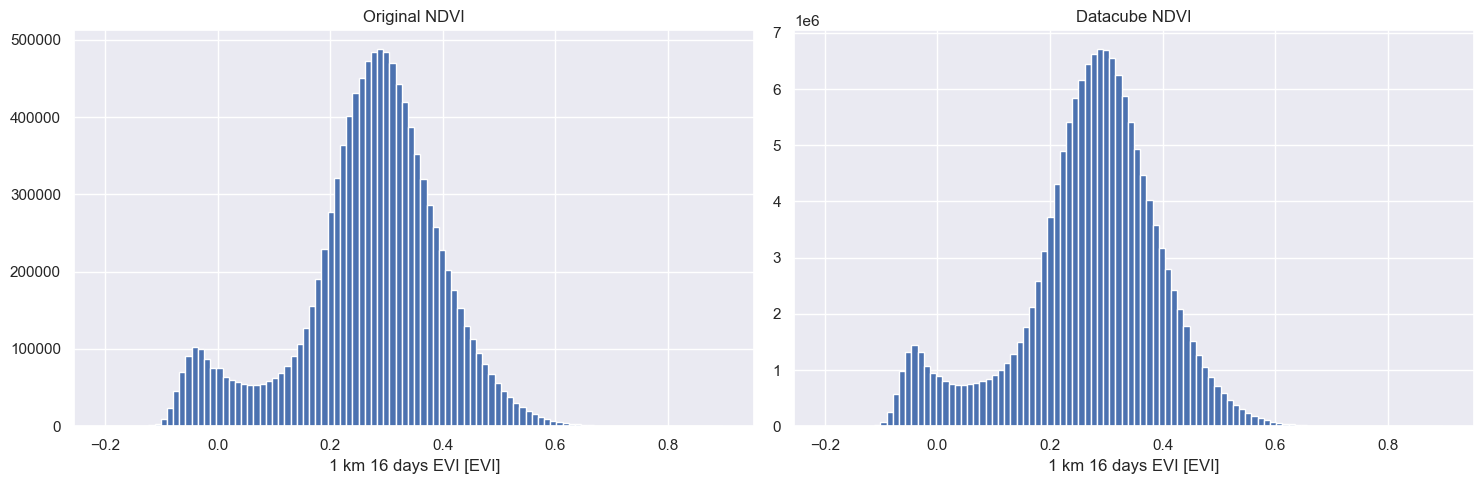

In [65]:
# Plot the EVI distribution from the original dataset and the datacube
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ndvi_filter.plot.hist(ax=ax[0], bins=100)
datacube['_1_km_16_days_EVI'].plot.hist(ax=ax[1], bins=100)
ax[0].set_title('Original NDVI')
ax[1].set_title('Datacube NDVI')
plt.show()

# LAI

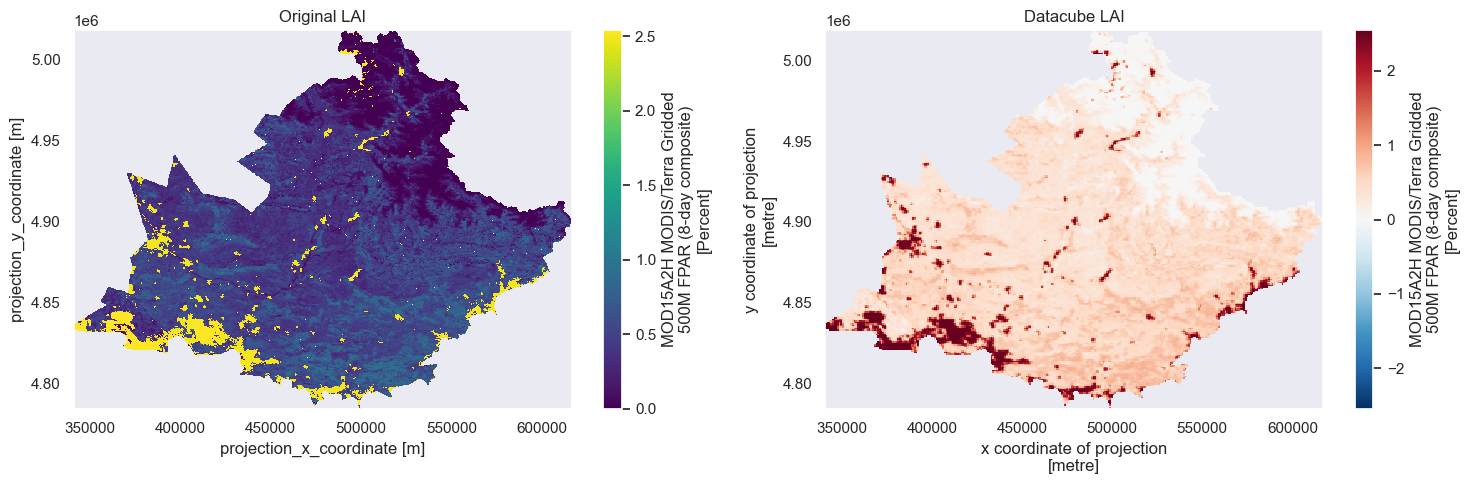

In [66]:
# Plot the Fpar from the original dataset and the datacube with seaborn
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
lai_filter.sel(time='2019-01-01').plot(ax=ax[0])
datacube['Fpar_500m'].sel(time='2019-01-01').plot(ax=ax[1])
ax[0].set_title('Original LAI')
ax[1].set_title('Datacube LAI')
plt.show()


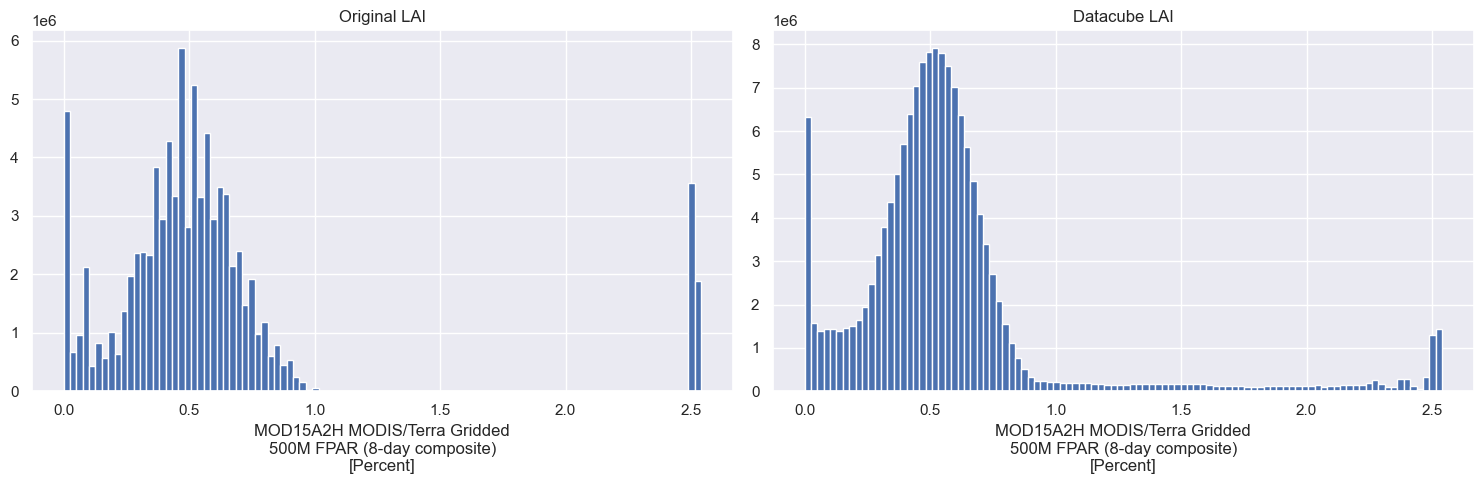

In [67]:
# Plot the Fpar distribution from the original dataset and the datacube
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
lai_filter.plot.hist(ax=ax[0], bins=100)
datacube['Fpar_500m'].plot.hist(ax=ax[1], bins=100)
ax[0].set_title('Original LAI')
ax[1].set_title('Datacube LAI')
plt.show()

In [68]:
# Statistics of the Fpar on the original dataset and the datacube
print('Original LAI')
print('The mean is: ', lai_filter.mean().values)
print('The standard deviation is: ', lai_filter.std().values)
print('The minimum is: ', lai_filter.min().values)
print('The maximum is: ', lai_filter.max().values)
print('The median is: ', lai_filter.median().values)

print('-------------------')
print('Datacube LAI')
print('The mean is: ', datacube['Fpar_500m'].mean().values)
print('The standard deviation is: ', datacube['Fpar_500m'].std().values)
print('The minimum is: ', datacube['Fpar_500m'].min().values)
print('The maximum is: ', datacube['Fpar_500m'].max().values)
print('The median is: ', datacube['Fpar_500m'].median().values)



Original LAI
The mean is:  0.5842182
The standard deviation is:  0.5626097917556763
The minimum is:  0.0
The maximum is:  2.5399999618530273
The median is:  0.4899999797344208
-------------------
Datacube LAI
The mean is:  0.5817183938355989
The standard deviation is:  0.45917675244593
The minimum is:  -1.1102230246251565e-16
The maximum is:  2.5399999618530273
The median is:  0.5121874734759331


In [69]:
# Counting the unique values of the Fpar on the original dataset and the datacube



In [70]:
print(lai_filter.groupby(lai_filter['Fpar_']).count())

KeyError: 'Fpar_'

# Evapotranspiration

In [ ]:
# Plot the ET from the original dataset and the datacube
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
evap_filter.sel(time='2019-01-01').plot(ax=ax[0])
datacube['ET_500m'].sel(time='2019-01-01').plot(ax=ax[1])
ax[0].set_title('Original ET')
ax[1].set_title('Datacube ET')
plt.show()

In [ ]:
# Plot the ET distribution from the original dataset and the datacube
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
evap_filter.plot.hist(ax=ax[0], bins=100)
datacube['ET_500m'].plot.hist(ax=ax[1], bins=100)
ax[0].set_title('Original ET')
ax[1].set_title('Datacube ET')
plt.show()

In [ ]:
# Counting the unique values of the ET on the original dataset and the datacube
print(evap.groupby('ET_500m').count())

In [ ]:
len(np.unique(evap_filter.values))

In [ ]:
len(np.unique(datacube['ET_500m'].values))

In [ ]:
# Statistics of the ET on the original dataset and the datacube
print('Original ET')
print(evap_filter.mean().values)
print(evap_filter.std().values)
print(evap_filter.min().values)
print(evap_filter.max().values)
print('-------------------')
print('Datacube ET')
print(datacube['ET_500m'].mean().values)
print(datacube['ET_500m'].std().values)
print(datacube['ET_500m'].min().values)
print(datacube['ET_500m'].max().values)

The distribution has been quiet changed. We have a lot more unique value than before. The mean is quite similar but the standard deviation has been reduced. We have to keep this in mind, maybe we will need to accomplish a categorical interpolation instead of a linear one.

# ERA5

In [ ]:
# Plot the distribution of the variables 't2m', 'v10', 'u10', 'tp' of the era_filter dataset and the datacube
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
era_filter['t2m'].plot.hist(ax=ax[0, 0], bins=100)
datacube['t2m'].plot.hist(ax=ax[0, 1], bins=100)
era_filter['v10'].plot.hist(ax=ax[1, 0], bins=100)
datacube['v10'].plot.hist(ax=ax[1, 1], bins=100)
ax[0, 0].set_title('Original t2m')
ax[0, 1].set_title('Datacube t2m')
ax[1, 0].set_title('Original v10')
ax[1, 1].set_title('Datacube v10')
plt.show()


In [ ]:
# Plot the distribution of the variables 'u10','tp' of the era_filter dataset and the datacube
fig, ax = plt.subplots(2, 2, figsize=(15, 5))
era_filter['u10'].plot.hist(ax=ax[0, 0], bins=100)
datacube['u10'].plot.hist(ax=ax[0, 1], bins=100)
era_filter['tp'].plot.hist(ax=ax[1, 0], bins=100)
datacube['tp'].plot.hist(ax=ax[1, 1], bins=100)
ax[0, 0].set_title('Original u10')
ax[0, 1].set_title('Datacube u10')
ax[1, 0].set_title('Original tp')
ax[1, 1].set_title('Datacube tp')
plt.show()


In [ ]:
# Statistics of the variables 't2m', 'v10', 'u10', 'tp' of the era_filter dataset and the datacube
print('Original t2m')
print(era_filter['t2m'].mean().values)
print(era_filter['t2m'].std().values)
print(era_filter['t2m'].min().values)
print(era_filter['t2m'].max().values)
print('-------------------')
print('Datacube t2m')
print(datacube['t2m'].mean().values)
print(datacube['t2m'].std().values)
print(datacube['t2m'].min().values)
print(datacube['t2m'].max().values)
print('-------------------')
print('Original v10')
print(era_filter['v10'].mean().values)
print(era_filter['v10'].std().values)
print(era_filter['v10'].min().values)
print(era_filter['v10'].max().values)
print('-------------------')
print('Datacube v10')
print(datacube['v10'].mean().values)
print(datacube['v10'].std().values)
print(datacube['v10'].min().values)
print(datacube['v10'].max().values)
print('-------------------')

In both case we notice the deviation has been reduced after interpolation.

# Fire Mask

In [71]:
# Print the legend of the variable FireMask
print(datacube['FireMask'].legend)

Classes:
0 missing input data
1 not processed (obsolete)
2 not processed (obsolete)
3 non-fire water
4 cloud
5 non-fire land
6 unknown
7 fire (low confidence)
8 fire (nominal confidence)
9 fire (high confidence)


In [74]:
np.unique(datacube['FireMask'].values)

array([3.        , 3.125     , 3.16666667, 3.16666667, 3.2       ,
       3.25      , 3.33333333, 3.375     , 3.4       , 3.4       ,
       3.5       , 3.6       , 3.625     , 3.66666667, 3.66666667,
       3.75      , 3.8       , 3.83333333, 3.83333333, 3.875     ,
       4.        , 4.125     , 4.16666667, 4.2       , 4.25      ,
       4.33333333, 4.375     , 4.4       , 4.5       , 4.6       ,
       4.625     , 4.66666667, 4.66666667, 4.75      , 4.8       ,
       4.83333333, 4.875     , 5.        , 5.125     , 5.25      ,
       5.33333333, 5.33333333, 5.375     , 5.4       , 5.5       ,
       5.6       , 5.625     , 5.66666667, 5.75      , 5.8       ,
       5.8       , 5.875     , 6.        , 6.125     , 6.2       ,
       6.25      , 6.33333333, 6.375     , 6.5       , 6.6       ,
       6.625     , 6.66666667, 6.66666667, 6.75      , 6.8       ,
       6.875     , 7.        , 7.125     , 7.16666667, 7.2       ,
       7.25      , 7.33333333, 7.375     , 7.4       , 7.5    

In [57]:
# SumClasses:of the count when FireMask is equal to 7,8 or 9
count_fire = burn_mask['FireMask'].where(burn_mask['FireMask']>=7).count(dim=['ydim','xdim'])

In [58]:
# Sum all the count
count_all = burn_mask['FireMask'].count(dim=['ydim','xdim'])

ImportError: Plotting of arrays of cftime.datetime objects or arrays indexed by cftime.datetime objects requires the optional `nc-time-axis` (v1.2.0 or later) package.

C:\Users\Quentin\anaconda3\envs\forecast\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


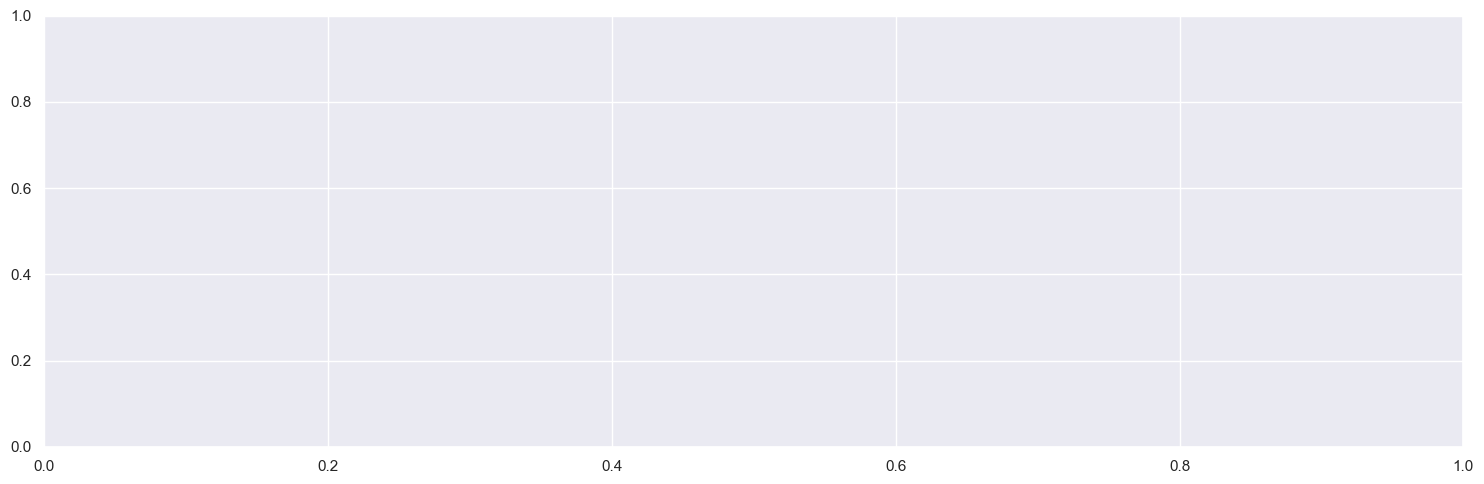

In [59]:
# Plot the coutn_fire by the count_all
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
(count_fire/count_all).plot(ax=ax)
ax.set_title('Fire Mask')
plt.show()

